# Naive Bayesian - Gaussian

## ===Task===
- Generate a 2 class data using sklearn.
- Put Gaussian Naive Bayesian Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 1) Generate a 2 class data using sklearn

X shape: (500, 10)
y shape: (500,)


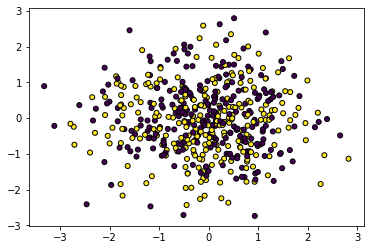

In [2]:
X, y = make_classification(n_samples=500, n_features=10, random_state=10)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


### Train_Test_split the data

In [3]:
import random
test_size = 0.3
train_size = 0.7

start_stop_index = int(train_size * len(X))
print(start_stop_index)
total_index = np.arange(len(X))
random.seed(10)
random.shuffle(total_index)

X[total_index[:start_stop_index]].shape

350


(350, 10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 10)
print(X_train.shape)
print(y_train.shape)

(350, 10)
(350,)


### Scaling

In [5]:
X_scaler = StandardScaler()

In [6]:
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [7]:
X_test.std(axis = 0)

array([0.93751716, 0.92254223, 0.90909239, 0.95735641, 1.05058694,
       0.94889543, 1.00035739, 0.90118369, 0.92358122, 0.92189141])

## 2) Create a Naive Bayesian Classification as class

In [8]:
class NaiveGaussian:
    
    def fit(self, X_train, y_train):
            
        self.classes = set(y_train)
        self.k = len(self.classes)
        self.n = X_train.shape[1]
        
        #====== 1st: Find the P(y = each class)=========  
        self.priorsList = []

        for each_class in self.classes:
            m =  len(X_train[y_train == each_class])
            self.priorsList.append(m)
        
            
        self.priorsProbList = [i / np.sum(self.priorsList) for i in self.priorsList]
        assert np.sum(self.priorsProbList) == 1, 'sum of priorsList must equal to one'
        
        
        #====== 2nd: find mean and std from X_train========= 
        
        mean = np.zeros((self.k, self.n))
        std = np.zeros((self.k, self.n))
        
        for each_class in range(self.k):
            mean[each_class:] = X_train[y_train == each_class].mean(axis = 0)
            std[each_class:]  = X_train[y_train == each_class].std(axis = 0)
            
        self.mean = mean
        self.std = std

            
        #====== 3rd: create function to compute P(X_test | y_train) ========= 

    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    
    def predict(self, X_test):
        posteriors = np.zeros((X_test.shape[0], self.k))
        
        for idx, label in enumerate(range(self.k)):
            likelihood = self.gaussian_pdf(X_test, self.mean[idx, :], self.std[idx, :])
#             print(f'likelihood shape: {likelihood.shape}')
        
            total_likelihood = np.prod(likelihood, axis = 1)
            posteriors[: , idx] = self.priorsProbList[label] * total_likelihood
#             print(f'total_likelihood: {total_likelihood}')
            
#             print(f'posteriors: {posteriors}')
        
        print(f'likelihood shape: {likelihood.shape}')
        print(f'total likelihood shape: {total_likelihood.shape}')
        print(f'total posteriors shape: {posteriors.shape}')
        
        yhat = np.argmax(posteriors, axis = 1)
        return yhat
        
        
    
        

---
## 3.1) Fit the model on the data to predict from X_test

In [9]:
NBG = NaiveGaussian()

In [10]:
NBG.fit(X_train, y_train)

In [11]:
print(f'classes in data: {NBG.classes}')
print(f'number in each class: {NBG.priorsList}')
print(f'priors of each class: {NBG.priorsProbList}')

classes in data: {0, 1}
number in each class: [170, 180]
priors of each class: [0.4857142857142857, 0.5142857142857142]


In [12]:
predicted = NBG.predict(X_test)
print(predicted)

likelihood shape: (150, 10)
total likelihood shape: (150,)
total posteriors shape: (150, 2)
[0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 0]


## 3.2 Calculate the accuracy with sklearn.metrics

In [13]:
print(classification_report(y_pred = NBG.predict(X_train), y_true = y_train))

likelihood shape: (350, 10)
total likelihood shape: (350,)
total posteriors shape: (350, 2)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       170
           1       0.90      0.89      0.90       180

    accuracy                           0.89       350
   macro avg       0.89      0.89      0.89       350
weighted avg       0.89      0.89      0.89       350



In [14]:
print(classification_report(y_pred = predicted, y_true = y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        80
           1       0.84      0.81      0.83        70

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



In [15]:
accuracy_score(predicted, y_test)

0.84

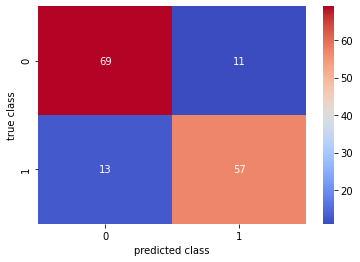

In [16]:
sns.heatmap(confusion_matrix(y_pred = predicted, y_true =y_test), annot=True, cmap = 'coolwarm')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.show()

## Let's try with X more than 2 classes

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.98, 'Synthetic data of 500 samples,\n 3 features and 5 classes')

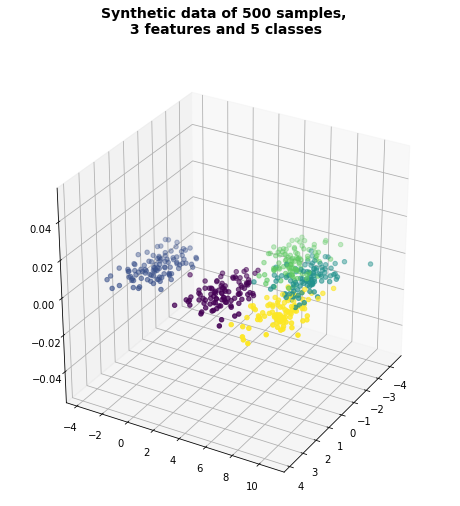

In [36]:
X, y = make_blobs(n_samples=500, centers=5, n_features= 3, random_state=0)
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = X[:, 0], ys = X[:,1], c=y)
ax.view_init(30, 30)
fig.suptitle('Synthetic data of 500 samples,\n 3 features and 5 classes', fontsize = 14, fontweight = 'bold')


### In this make_blobs data, we have n = 500, features or n =3 and classes or k = 5

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
assert set(y_train) == set(y_test)

In [20]:
print(set(y))

{0, 1, 2, 3, 4}


In [21]:
NGB2 = NaiveGaussian()

In [22]:
NGB2.fit(X_train, y_train)

In [23]:
NGB2.priorsProbList

[0.19428571428571428,
 0.19142857142857142,
 0.19714285714285715,
 0.22285714285714286,
 0.19428571428571428]

In [24]:
predicted2 = NGB2.predict(X_test)
print(predicted2)

likelihood shape: (150, 3)
total likelihood shape: (150,)
total posteriors shape: (150, 5)
[2 0 0 4 0 4 2 0 4 2 1 2 4 2 4 1 0 2 1 3 0 4 4 0 0 1 4 4 3 2 0 2 1 2 0 0 1
 2 1 1 2 2 0 1 3 3 0 3 4 0 2 0 2 3 1 1 3 1 4 2 4 2 2 1 0 0 4 1 0 2 0 3 2 3
 2 4 2 2 3 1 4 1 1 4 0 4 1 1 0 4 1 0 4 4 3 0 2 0 4 4 3 1 3 4 4 0 4 1 2 2 3
 3 3 0 0 4 2 2 4 4 1 4 1 1 1 3 0 3 4 2 2 0 4 3 0 2 1 1 0 1 1 1 0 3 1 2 3 4
 3 1]


In [25]:
print(classification_report(y_pred= NGB2.predict(X_train), y_true = y_train))

likelihood shape: (350, 3)
total likelihood shape: (350,)
total posteriors shape: (350, 5)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.99      1.00      0.99        67
           2       1.00      1.00      1.00        69
           3       1.00      0.99      0.99        78
           4       1.00      1.00      1.00        68

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



In [26]:
print(classification_report(y_pred= predicted2, y_true = y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        31
           3       0.95      0.95      0.95        22
           4       1.00      1.00      1.00        32

    accuracy                           0.99       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.99      0.99      0.99       150



## Summary on the 2 models 
- for the make_classification of 2 features and 2 classes, the accuracy score of training is at 89% and 84% for test set
- for the make_blobs of 3 features and 5 classes, the accuracy score of training set is at 99% and 98% for test set

---